In [18]:
#use AI general kernel
from awpy import DemoParser
from textblob import TextBlob
import pandas as pd
from detoxify import Detoxify
import matplotlib.pyplot as plt
import numpy as np

filename = 'exampledemos/681371d2-9b49-4292-b867-97d688215dde.dem'

demo_parser = DemoParser(
    demofile = filename, 
    demo_id = "testgame1", 
    parse_chat = True
    )

data = demo_parser.parse()

print out all the chat data so i can figure out whats going on

In [19]:
for chat in data['chatMessages']:
    print(chat)

{'steamID': None, 'text': ' \x04[FACEIT^] Available commands:', 'tick': 98, 'params': None, 'isChat': True, 'isChatAll': False, 'type': 'SayText'}
{'steamID': None, 'text': ' \x04- !gg to launch a forfeit vote during the match', 'tick': 98, 'params': None, 'isChat': True, 'isChatAll': False, 'type': 'SayText'}
{'steamID': None, 'text': ' \x04- !report to report a teammate', 'tick': 98, 'params': None, 'isChat': True, 'isChatAll': False, 'type': 'SayText'}
{'steamID': None, 'text': ' \x07[FACEIT^] 4 minutes left to join the server.', 'tick': 220, 'params': None, 'isChat': True, 'isChatAll': False, 'type': 'SayText'}
{'steamID': None, 'text': ' \x04[FACEIT^] Available commands:', 'tick': 2018, 'params': None, 'isChat': True, 'isChatAll': False, 'type': 'SayText'}
{'steamID': None, 'text': ' \x04- !gg to launch a forfeit vote during the match', 'tick': 2018, 'params': None, 'isChat': True, 'isChatAll': False, 'type': 'SayText'}
{'steamID': None, 'text': ' \x04- !report to report a teammat

put all the chat data into a dictionary with the player ids

In [20]:
#create a list of all the players in the game
playerList = []
for chat in data['chatMessages']:
    if chat['steamID'] not in playerList:
        playerList.append(chat['steamID'])

#create a dictionary of players and their chat messages
playerChat = {}
for player in playerList:
    playerChat[player] = []
    for chat in data['chatMessages']:
        if chat['steamID'] == player:
            playerChat[player].append(chat['text'])

organisedChat = {}

#give each player a unique ID for qol
ID = 0
for each in playerChat:
    organisedChat[ID] = {'steamID': each, 'chatLog': playerChat[each]}
    ID += 1

#print out the chat logs for every player except from the first one
for i in range(1, len(organisedChat)):
    print("Player", i, "| SteamID:", organisedChat[i]['steamID'])
    print(organisedChat[i]['chatLog'])
    

Player 1 | SteamID: 76561199070646588
['!switch', 'ye', '!gg']
Player 2 | SteamID: 76561198307497830
['i heard u secret but didnt realise u were there so quick lol', 'was going to try and ferrari u :(', 'noooooooooooo', 'nice sht', 'SHOT', 'yes thats not what  i mean', 'bye astrikss', 'hello astrikss', 'welcome back', 'hello', 'gh', 'yes ', 'balu pro', 'balu', 'u fucking cunt', 'listen here', 'lmfao', 'im dead', 'balu', 'i killed u once with knife', 'no need', 'hello', 'open dorr', 'clos dorr', 'nugget box', 'hello', 'wat', 'how tosic', 'gh', 'why u say gg', 'we still need to win 3 rounds', 'anything is possible', 'get good then', 'im joking i hate bad team mates', 'holy shit', 'catching some waves?', 'that is probably the problem', 'ggwp', '10-20']
Player 3 | SteamID: 76561198975289761
['!gg', 'well nice shit', 'two piece', '::(', 'poor', 'toxic enem', 'green u need some kills maybe????', 'bg']
Player 4 | SteamID: 76561198134978650
['noooooo', 'gh', 'HI', 'mm?', ';-----;;;', 'ggwp']
P

In [21]:
def correct_spelling(text):
    blob = TextBlob(text)
    corrected_text = str(blob.correct())
    return corrected_text

testtext = 'GO KILL URSELFT'

print(correct_spelling(testtext))

of KILL URSELFT


replace acronyms in the corpus

In [22]:
# Load the acronyms from the CSV file
acronyms = pd.read_csv('csacronyms.csv', header=None, names=['Acronym', 'Full Form'])

# Create a dictionary from the DataFrame
acronym_dict = acronyms.set_index('Acronym')['Full Form'].to_dict()

def preprocess_text(text):
    # Split the text into words
    words = text.split()

    # Replace acronyms with their full forms
    words = [acronym_dict.get(word, word) for word in words]

    # Join the words back into a single string
    text = ' '.join(words)

    return text

# Preprocess the chat logs
for i in range(1, len(organisedChat)):
    
    organisedChat[i]['chatLog'] = [preprocess_text(str.lower(text)) for text in organisedChat[i]['chatLog']]
    
#print out the chat logs for every player except from the first one
for i in range(1, len(organisedChat)):
    print("SteamID:", organisedChat[i]['steamID'])
    print(organisedChat[i]['chatLog'])

SteamID: 76561199070646588
['!switch', 'ye', '!gg']
SteamID: 76561198307497830
['i heard you secret but didnt realise you were there so quick lol', 'was going to try and ferrari you :(', 'noooooooooooo', 'nice sht', 'shot', 'yes thats not what i mean', 'bye astrikss', 'hello astrikss', 'welcome back', 'hello', 'good half', 'yes', 'balu pro', 'balu', 'you fucking cunt', 'listen here', 'lmfao', 'im dead', 'balu', 'i killed you once with knife', 'no need', 'hello', 'open dorr', 'clos dorr', 'nugget box', 'hello', 'wat', 'how tosic', 'good half', 'why you say good game', 'we still need to win 3 rounds', 'anything is possible', 'get good then', 'im joking i hate bad team mates', 'holy shit', 'catching some waves?', 'that is probably the problem', 'good game well played', '10-20']
SteamID: 76561198975289761
['!gg', 'well nice shit', 'two piece', '::(', 'poor', 'toxic enem', 'green you need some kills maybe????', 'bg']
SteamID: 76561198134978650
['noooooo', 'good half', 'hi', 'mm?', ';-----;;

apply detoxify to any piece/array of text for testing

{'toxicity': [0.8758792877197266], 'severe_toxicity': [0.0015026468317955732], 'obscene': [0.010093044489622116], 'identity_attack': [0.0020795115269720554], 'insult': [0.16108813881874084], 'threat': [0.2148556262254715], 'sexual_explicit': [0.0039220466278493404]}


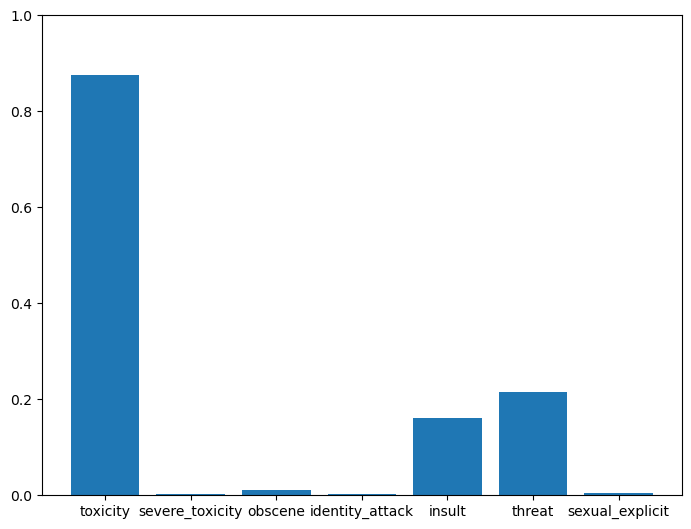

In [23]:
playerID = 2
sampleplayer = organisedChat[playerID]['chatLog']

def analyze_toxicity(sentence):
    results = Detoxify('multilingual').predict(sentence)
    return results

input = ["hate you"]

output = analyze_toxicity(input)
print(output)

#calculate the average of each characteristic if there are multiple sentences
for key in output:
    output[key] = sum(output[key])/len(output[key])
    
#plot the data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(output.keys(), output.values())
ax.set_ylim(0, 1)
plt.show()

calculate the average toxicity characteristics values for all players in the game

In [18]:
#calculate the average of each characteristic for each player
averages = {}
sums = {}
for player in organisedChat:
    input = organisedChat[player]['chatLog']
    output = analyze_toxicity(input)
    sum_output = {}
    for key in output:
        sum_output[key] = sum(output[key])
        output[key] = sum_output[key] / len(output[key])
    averages[player, organisedChat[player]['steamID']] = output
    sums[player, organisedChat[player]['steamID']] = sum_output
print(averages)
print(sums)

{(0, None): {'toxicity': 0.04641325208002753, 'severe_toxicity': 0.0035660674039165456, 'obscene': 0.02254575801145109, 'identity_attack': 0.0022666800081531297, 'insult': 0.014378678011959054, 'threat': 0.012862781282498926, 'sexual_explicit': 0.005622996796411196}, (1, 76561199070646588): {'toxicity': 0.003528761522223552, 'severe_toxicity': 0.00014023424106805274, 'obscene': 0.002430126827675849, 'identity_attack': 0.00032909146102610976, 'insult': 0.0032060189211430648, 'threat': 0.00015075519574262822, 'sexual_explicit': 8.488992292162341e-05}, (2, 76561198307497830): {'toxicity': 0.1415192923092176, 'severe_toxicity': 0.014942250797106774, 'obscene': 0.055032845437287904, 'identity_attack': 0.007062950290744014, 'insult': 0.036828312963151776, 'threat': 0.05643101174362714, 'sexual_explicit': 0.022025328625880858}, (3, 76561198975289761): {'toxicity': 0.26363200600462733, 'severe_toxicity': 0.0040256236079585506, 'obscene': 0.12169112409901572, 'identity_attack': 0.00267266428909

plot all the players and their averages on a bar chart

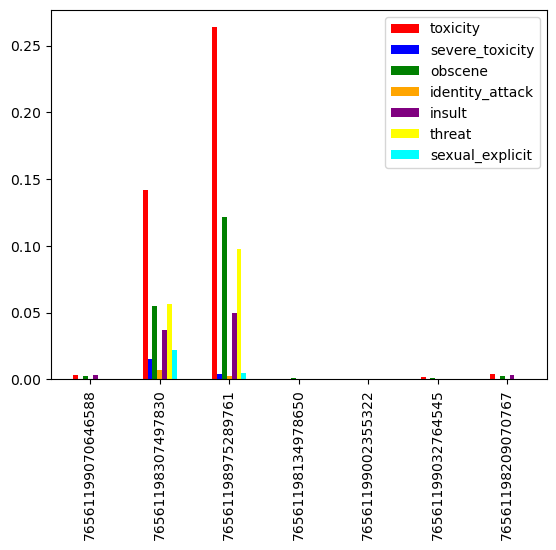

In [19]:
# Get the player IDs and their corresponding averages
player_ids = [player[1] for player in averages if player[1] is not None]
player_averages = [averages[player] for player in averages if player[1] is not None]

# Set the characteristics for the x-axis labels
characteristics = list(player_averages[0].keys())
x = np.arange(len(player_ids))

# Set the width of each bar
bar_width = 0.07

# Set the color palette for the bars
color_palette = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan']

# Plot the bars for each characteristic
fig, ax = plt.subplots()
for i, characteristic in enumerate(characteristics):
    x_pos = x + i * bar_width
    y = [player_averages[j][characteristic] for j in range(len(player_ids))]
    ax.bar(x_pos, y, bar_width, label=characteristic, color=color_palette[i])

# Set the x-axis labels and tick positions
ax.set_xticks(x + (len(characteristics) - 1) * bar_width / 2)
ax.set_xticklabels(player_ids, rotation='vertical')

# Add a legend
ax.legend()

# Show the plot
plt.show()

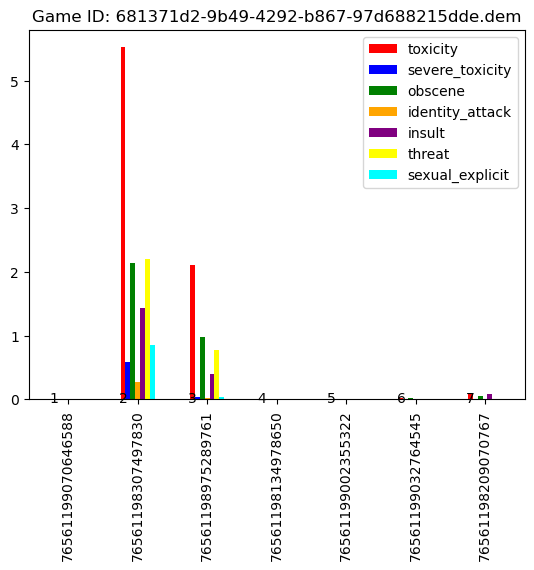

In [20]:
# Get the player IDs and their corresponding sums
player_ids = [player[1] for player in sums if player[1] is not None]
player_sums = [sums[player] for player in sums if player[1] is not None]

# Set the characteristics for the x-axis labels
characteristics = list(player_sums[0].keys())
x = np.arange(len(player_ids))

# Set the width of each bar
bar_width = 0.07

# Set the color palette for the bars
color_palette = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan']

# Plot the bars for each characteristic
fig, ax = plt.subplots()
for i, characteristic in enumerate(characteristics):
    x_pos = x + i * bar_width
    y = [player_sums[j][characteristic] for j in range(len(player_ids))]
    ax.bar(x_pos, y, bar_width, label=characteristic, color=color_palette[i])

# Set the x-axis labels and tick positions
ax.set_xticks(x + (len(characteristics) - 1) * bar_width / 2)
ax.set_xticklabels(player_ids, rotation='vertical')

#add the player number next to each player ID
for i, player_id in enumerate(player_ids):
    ax.text(i, -0.1, f'{i+1}', ha='center', va='bottom')

#add a title that lists the game ID and the map
ax.set_title('Game ID: ' + filename.split('/')[1])

# Add a legend
ax.legend()

# Show the plot
plt.show()

07:27:17 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
07:27:17 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
07:27:17 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


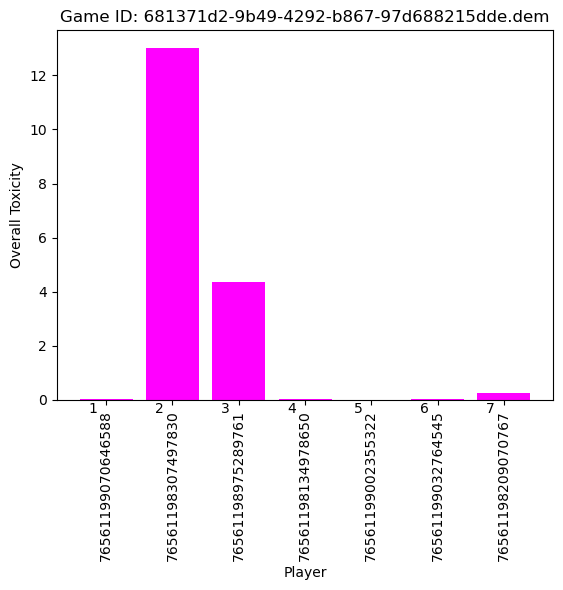

In [21]:
weights = {
    'toxicity': 1,
    'severe_toxicity': 1,
    'obscene': 1,
    'threat': 1,
    'insult': 1,
    'identity_attack': 1,
    'sexual_explicit': 1
}

# calculate the overall toxicity for each player and add it to the sums dictionary
for player in sums:
    overall_toxicity = 0
    for key in weights:
        overall_toxicity += sums[player][key] * weights[key]
    sums[player]['overall_toxicity'] = overall_toxicity
    
# plot the overall toxicity for each player on a bar chart with the player IDs on the x-axis and the overall toxicity on the y-axis
player_ids = [str(player[1]) for player in sums if player[1] is not None]
overall_toxicities = [sums[player]['overall_toxicity'] for player in sums if player[1] is not None]

fig, ax = plt.subplots()
ax.bar(player_ids, overall_toxicities)
plt.xticks(rotation='vertical')

#add the player number next to each player ID
for i, player_id in enumerate(player_ids):
    ax.text(i-0.2, -0.6, f'{i+1}', ha='center', va='bottom')

#add a title that lists the game ID and the map
ax.set_title('Game ID: ' + filename.split('/')[1])

#add labels to the x and y axis
plt.xlabel('Player')
plt.ylabel('Overall Toxicity')

#set the colour of the bars to purple
ax.bar(player_ids, overall_toxicities, color='magenta')

plt.show()

In [22]:
playerID = 2
steamID = organisedChat[playerID]['steamID']
chatLog = organisedChat[playerID]['chatLog']
print("playerID:", playerID)
print("steamID:", steamID)
print("chatLog:")
for chat in chatLog:
    print(chat)

playerID: 2
steamID: 76561198307497830
chatLog:
i heard you secret but didnt realise you were there so quick lol
was going to try and ferrari you :(
noooooooooooo
nice sht
shot
yes thats not what i mean
bye astrikss
hello astrikss
welcome back
hello
good half
yes
balu pro
balu
you fucking cunt
listen here
lmfao
im dead
balu
i killed you once with knife
no need
hello
open dorr
clos dorr
nugget box
hello
wat
how tosic
good half
why you say good game
we still need to win 3 rounds
anything is possible
get good then
im joking i hate bad team mates
holy shit
catching some waves?
that is probably the problem
good game well played
10-20
